# Import Library

In [1]:
import os, shutil
import tensorflow as tf

# Dataset

In [7]:
original_dataset_dir = 'D:/my_folders/AI with python/CNN/my_dataset'

In [8]:
base_dir = 'D:/my_folders/AI with python/CNN/Working Directory'
os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directories for trainning, validation and testing data

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [11]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [12]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Cat data

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# Dog data

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

# dataset status now

In [84]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Building Model

In [85]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Summary

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

# Compilation (optimizer & loss)

In [87]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data pre-processing --> ImageDataGenerator

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [89]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting

In [90]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 58s 571ms/step - loss: 0.6960 - acc: 0.5116 - val_loss: 0.6728 - val_acc: 0.5420
Epoch 2/30
100/100 [==============================] - 55s 550ms/step - loss: 0.6622 - acc: 0.6052 - val_loss: 0.6726 - val_acc: 0.5320
Epoch 3/30
100/100 [==============================] - 78s 778ms/step - loss: 0.6065 - acc: 0.6570 - val_loss: 0.6105 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 59s 591ms/step - loss: 0.5371 - acc: 0.7282 - val_loss: 0.5829 - val_acc: 0.7000
Epoch 5/30
100/100 [==============================] - 63s 627ms/step - loss: 0.5201 - acc: 0.7485 - val_loss: 0.7225 - val_acc: 0.5800
Epoch 6/30
100/100 [==============================] - 59s 593ms/step - loss: 0.5014 - acc: 0.7517 - val_loss: 0.5729 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 65s 652ms/step - loss: 0.4844 - acc: 0.7770 - val_loss: 0.5526 - val_acc: 0.7110
Epoch 8/30
100/100 [==============================] - 6

# model saving

In [91]:
model.save('cats_and_dogs_small_1.h5')

# Plotting

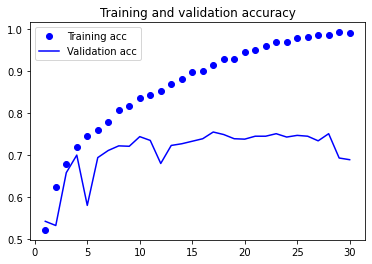

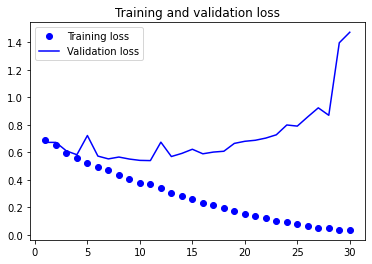

In [92]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Data augmentation by ImageDataGenerator

In [93]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Displaying some random images after augmentation

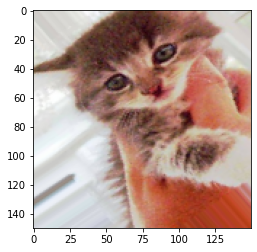

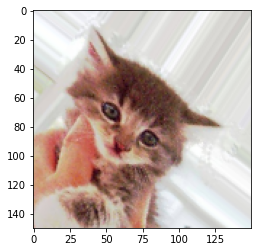

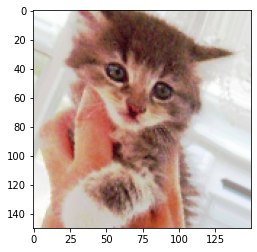

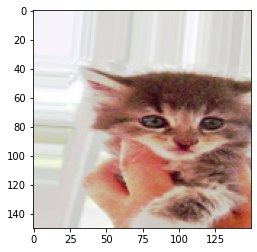

In [94]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# New model includes dropout

In [95]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Summary

In [96]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

# Again Compilation

In [97]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Trainning using data augmentation generators

In [98]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fitting

In [99]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 66s 649ms/step - loss: 0.6949 - acc: 0.5050 - val_loss: 0.6890 - val_acc: 0.5340
Epoch 2/100
100/100 [==============================] - 71s 714ms/step - loss: 0.6885 - acc: 0.5377 - val_loss: 0.6706 - val_acc: 0.6090
Epoch 3/100
100/100 [==============================] - 64s 640ms/step - loss: 0.6770 - acc: 0.5650 - val_loss: 0.6655 - val_acc: 0.5790
Epoch 4/100
100/100 [==============================] - 72s 720ms/step - loss: 0.6688 - acc: 0.5750 - val_loss: 0.6475 - val_acc: 0.6230
Epoch 5/100
100/100 [==============================] - 72s 720ms/step - loss: 0.6610 - acc: 0.6017 - val_loss: 0.6440 - val_acc: 0.6090
Epoch 6/100
100/100 [==============================] - 64s 641ms/step - loss: 0.6363 - acc: 0.6419 - val_loss: 0.6041 - val_acc: 0.6640
Epoch 7/100
100/100 [==============================] - 71s 712ms/step - loss: 0.6170 - acc: 0.6629 - val_loss: 0.5916 - val_acc: 0.6800
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 57s 571ms/step - loss: 0.4593 - acc: 0.7822 - val_loss: 0.4862 - val_acc: 0.7690
Epoch 62/100
100/100 [==============================] - 54s 538ms/step - loss: 0.4569 - acc: 0.7939 - val_loss: 0.4427 - val_acc: 0.8000
Epoch 63/100
100/100 [==============================] - 54s 537ms/step - loss: 0.4333 - acc: 0.7997 - val_loss: 0.4868 - val_acc: 0.7930
Epoch 64/100
100/100 [==============================] - 54s 536ms/step - loss: 0.4411 - acc: 0.7939 - val_loss: 0.4638 - val_acc: 0.7970
Epoch 65/100
100/100 [==============================] - 54s 535ms/step - loss: 0.4254 - acc: 0.8073 - val_loss: 0.4733 - val_acc: 0.7840
Epoch 66/100
100/100 [==============================] - 54s 537ms/step - loss: 0.4355 - acc: 0.7997 - val_loss: 0.4456 - val_acc: 0.8090
Epoch 67/100
100/100 [==============================] - 54s 537ms/step - loss: 0.4438 - acc: 0.7932 - val_loss: 0.4398 - val_acc: 0.7870
Epoch 68/100
100/100 [===================

In [100]:
model.save('cats_and_dogs_small_2.h5')

# Plotting

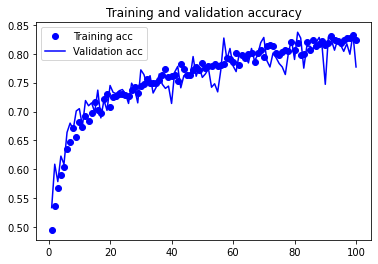

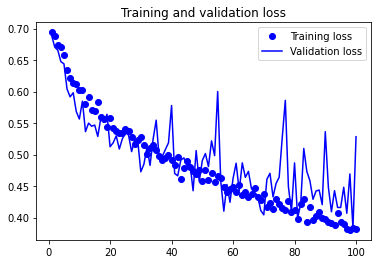

In [101]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Testing

In [169]:
predict_dir_path = "D:/my_folders/AI with python/CNN/test_data/"

In [170]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path,f))]
print(onlyfiles)

['505.jpg', '506.jpg', '507.jpg', '508.jpg', '509.jpg', '510.jpg', '511.jpg', '512.jpg', '513.jpg', '514.jpg', '517.jpg', '519.jpg', '520.jpg', '533.jpg']


In [171]:
# predicting images
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

c:\users\tls\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


505.jpg: cat
506.jpg: cat
507.jpg: dog
508.jpg: cat
509.jpg: cat
510.jpg: dog
511.jpg: dog
512.jpg: cat
513.jpg: cat
514.jpg: dog
517.jpg: dog
519.jpg: cat
520.jpg: cat
533.jpg: cat
Total Dogs : 5
Total Cats : 9
